In [ ]:
#Real time Microsoft stock: https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
!pip install -U kaleido

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

#real-time company stock:
ticker = 'MSFT'  #can change the name for different company stock
stock_data = yf.download(ticker, period="max")

#save the data to CSV file
csv_file_path = f'/content/{ticker}.csv'
stock_data.to_csv(csv_file_path)

df = pd.read_csv(csv_file_path)
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9645,2024-06-21,447.380005,450.579987,446.510010,449.779999,449.779999,34486200
9646,2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
9647,2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
9648,2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000


In [ ]:
#2 important fields
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9645,2024-06-21,449.779999
9646,2024-06-24,447.670013
9647,2024-06-25,450.950012
9648,2024-06-26,452.160004


In [ ]:
#column Date has type of object
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9645    2024-06-21
9646    2024-06-24
9647    2024-06-25
9648    2024-06-26
9649    2024-06-27
Name: Date, Length: 9650, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2]) #0,1,2: vị trí y,m,d trong mảng split
    return datetime.datetime(year=year, month=month, day=day)

#test the funcion
datetime_object = str_to_datetime('2015-01-01')
datetime_object

datetime.datetime(2015, 1, 1, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-56-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9645   2024-06-21
9646   2024-06-24
9647   2024-06-25
9648   2024-06-26
9649   2024-06-27
Name: Date, Length: 9650, dtype: datetime64[ns]

In [ ]:
#take Date column as index
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-06-21,449.779999
2024-06-24,447.670013
2024-06-25,450.950012


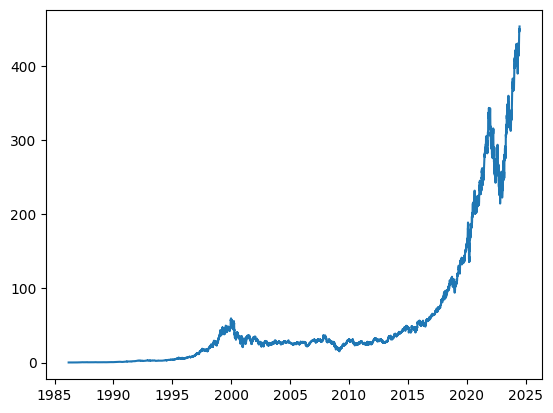

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

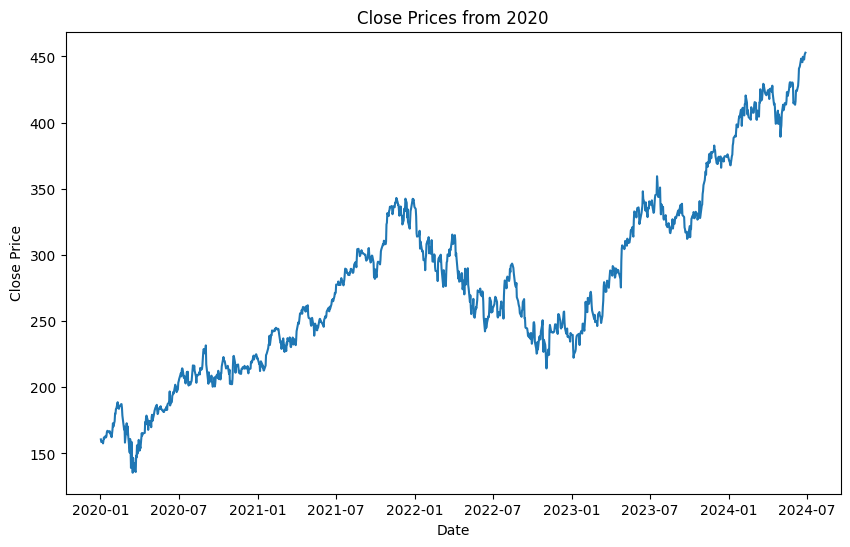

In [ ]:
#take a closer look around 2020-present
filtered_df = df.loc['2020-01-01':]

plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Close'])
plt.title('Close Prices from 2020')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
#supervised learning
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
#(n-i) index days before the target day
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

#train around: '2021-03-25' since there weren't too much fluctuations before
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-06-14',
                                n=3)
windowed_df
#target-x days is the input to feed into the model
#target is the corresponding output

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
807,2024-06-10,424.010010,424.519989,423.850006,427.869995
808,2024-06-11,424.519989,423.850006,427.869995,432.679993
809,2024-06-12,423.850006,427.869995,432.679993,441.059998
810,2024-06-13,427.869995,432.679993,441.059998,441.579987


In [ ]:
#convert the target days into 3D arrays to feed into a tensorflow model
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0] #target date

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) #3D array: number of observations, middle columns, and variables (1 in this case)

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((812,), (812, 3, 1), (812,))

## Train, Validation, Test


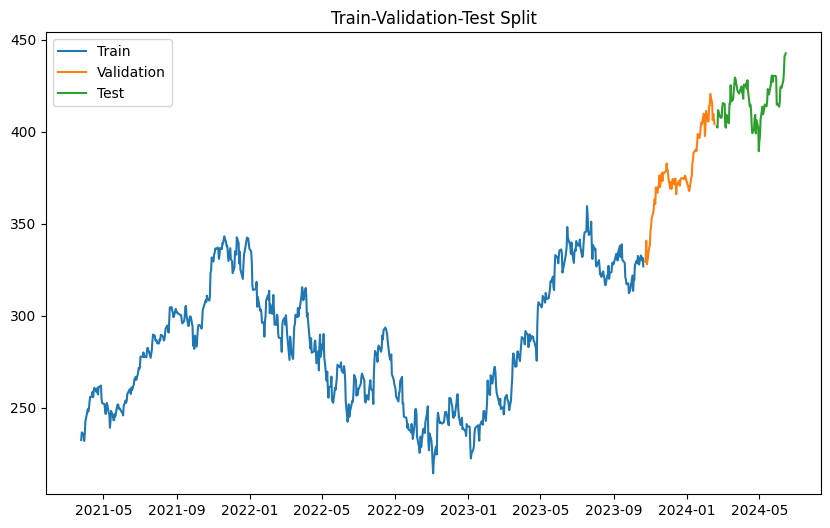

In [ ]:
#80% train, 10% validation, 10% test
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.title('Train-Validation-Test Split')

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)), #3 days in the past, 1 feature
                    layers.LSTM(64), #64 neurons to avoid overfitting
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]) #1 predicted output

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001), #0.001 thay đổi tùy TH
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100
21/21 [==============================] - 3s 36ms/step - loss: 81983.4922 - mean_absolute_error: 284.3273 - val_loss: 142147.7969 - val_mean_absolute_error: 376.4018
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 80909.9453 - mean_absolute_error: 282.4358 - val_loss: 140127.2812 - val_mean_absolute_error: 373.7082
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 78579.7422 - mean_absolute_error: 278.2788 - val_loss: 135127.4062 - val_mean_absolute_error: 366.9569
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 73302.0000 - mean_absolute_error: 268.6017 - val_loss: 126005.4531 - val_mean_absolute_error: 354.3099
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 65025.1836 - mean_absolute_error: 252.6759 - val_loss: 111597.7812 - val_mean_absolute_error: 333.3593
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 53015.0703 - mean_absolute_error: 227.5841 - v

21/21 [==============================] - 0s 2ms/step


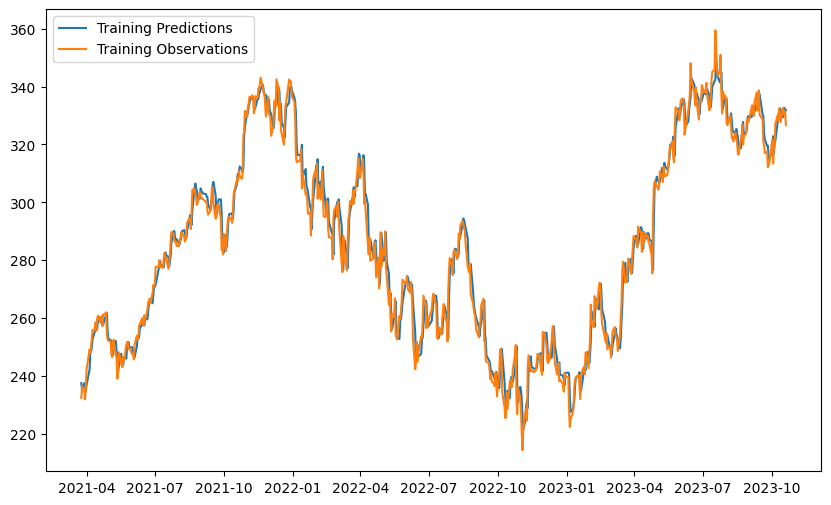

In [ ]:
train_predictions = model.predict(X_train).flatten() #flatten to convert the prediction result into 1D array

plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 4ms/step


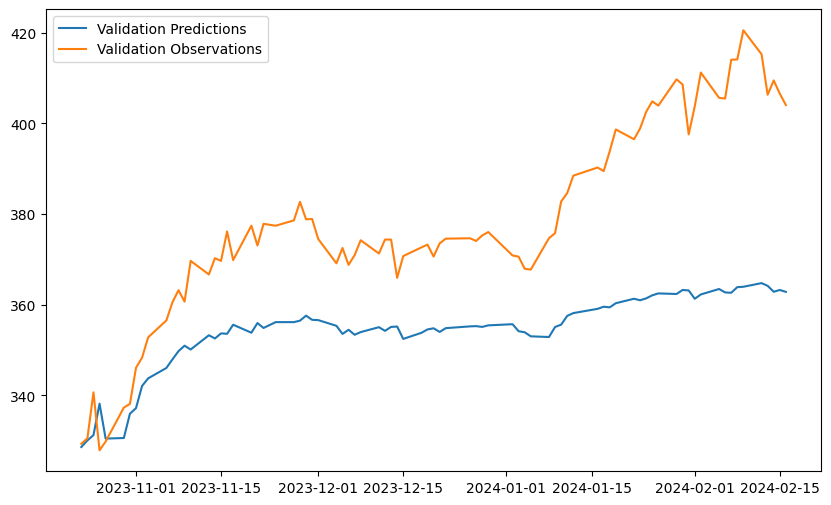

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 4ms/step


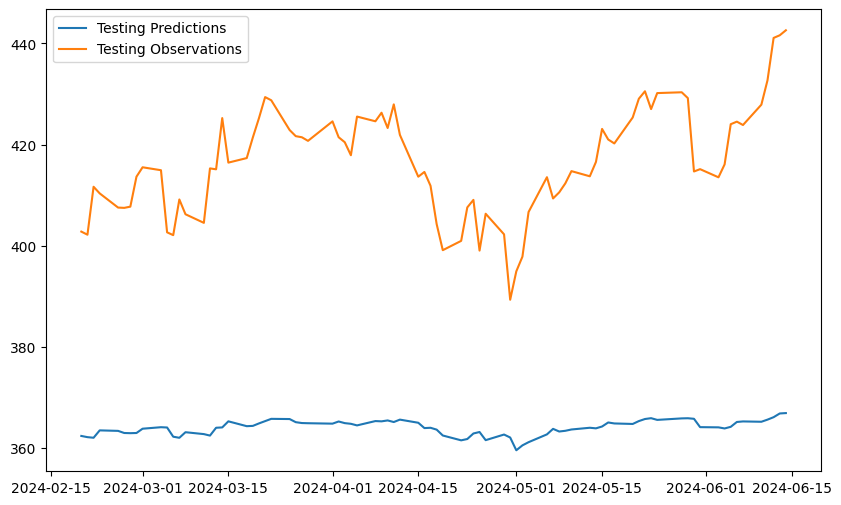

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, train_predictions)
mse_val = mean_squared_error(y_val, val_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, train_predictions)
mae_val = mean_absolute_error(y_val, val_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)

print('Evaluate the model:')
print(f'Training MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}')
print(f'Validation MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}')
print(f'Testing MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}')

Evaluate the model:
Training MSE: 25.775270462036133, RMSE: 5.076935291290283, MAE: 3.9069042205810547
Validation MSE: 762.4622802734375, RMSE: 27.612720489501953, MAE: 24.02372932434082
Testing MSE: 2851.311767578125, RMSE: 53.397674560546875, MAE: 52.544559478759766


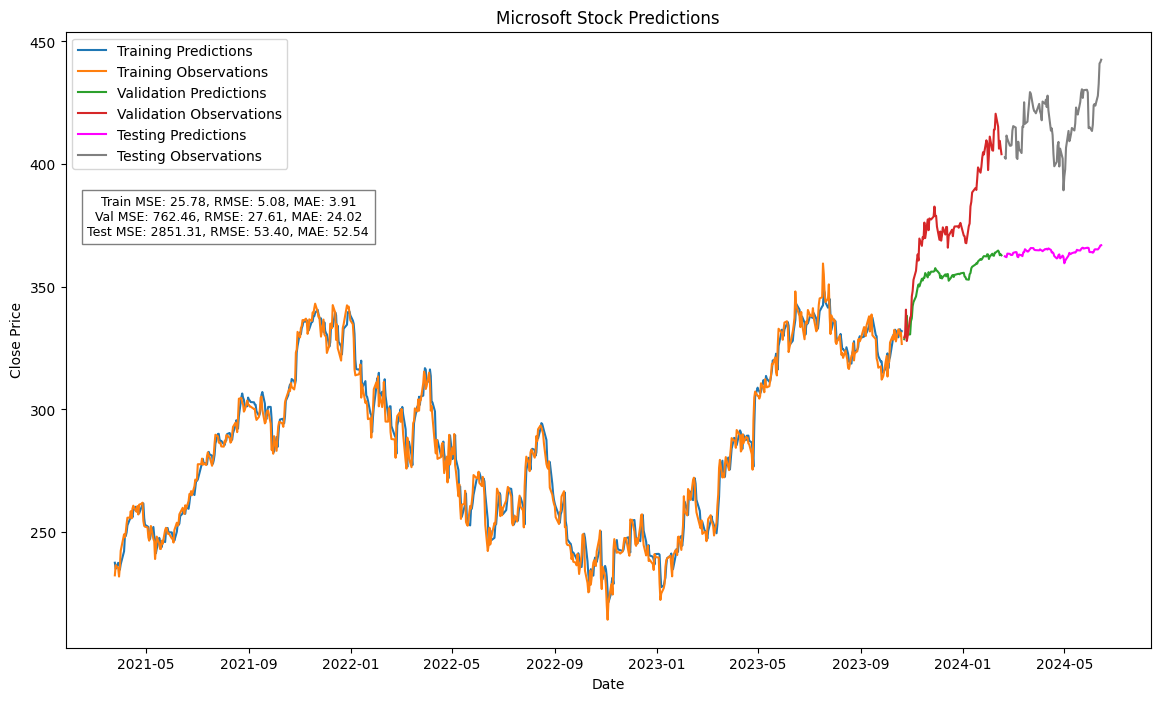

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions,color='magenta')
plt.plot(dates_test, y_test,color='gray')
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.text(0.15, 0.7, f'Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}\n'
                   f'Val MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, MAE: {mae_val:.2f}\n'
                   f'Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}',
         fontsize=9, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, horizontalalignment='center', verticalalignment='center')
plt.title('Microsoft Stock Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


##Apply K-fold cross-validation to improve the model


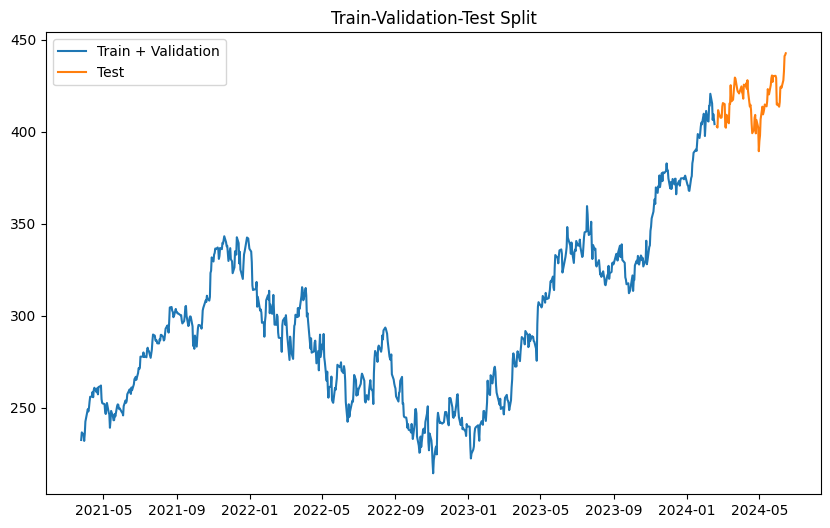

In [ ]:
# 90% train + validation, 10% test
q_90 = int(len(dates) * .9)

dates_train_val, X_train_val, y_train_val = dates[:q_90], X[:q_90], y[:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train_val, y_train_val, label='Train + Validation')
plt.plot(dates_test, y_test, label='Test')
plt.title('Train-Validation-Test Split')
plt.legend(['Train + Validation', 'Test'])
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for train_index, val_index in kf.split(X_train_val): #k-fold on train + val
    X_train_kf, X_val_kf = X_train_val[train_index], X_train_val[val_index]
    y_train_kf, y_val_kf = y_train_val[train_index], y_train_val[val_index]

    model = Sequential([layers.Input((3, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])

    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['mean_absolute_error'])

    model.fit(X_train_kf, y_train_kf, validation_data=(X_val_kf, y_val_kf), epochs=100, verbose=0)

    #evaluate the model
    val_mse, val_mae = model.evaluate(X_val_kf, y_val_kf, verbose=0)
    results.append((val_mse, val_mae))

#calculate the mean and standard deviation of the results
mean_mse = np.mean([r[0] for r in results])
std_mse = np.std([r[0] for r in results])
mean_mae = np.mean([r[1] for r in results])
std_mae = np.std([r[1] for r in results])

print(f'Mean MSE: {mean_mse}, Standard Deviation MSE: {std_mse}')
print(f'Mean MAE: {mean_mae}, Standard Deviation MAE: {std_mae}')


Mean MSE: 38.36733627319336, Standard Deviation MSE: 7.599304297085893
Mean MAE: 4.8501592636108395, Standard Deviation MAE: 0.5943003468526684


###Retrain the final model on the entire training + validation dataset:
- Utilize all available data (train + validation) so the model can learn more from the entire available data, improving model performance.
- Ensure accurate evaluation on the separate test set.


In [ ]:
final_model = Sequential([layers.Input((3, 1)),
                          layers.LSTM(64),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)])
final_model.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['mean_absolute_error'])

final_model.fit(X_train_val, y_train_val, epochs=100, verbose=0)


In [ ]:
#make predictions
train_val_predictions = final_model.predict(X_train_val, verbose=0)
test_predictions_kf = final_model.predict(X_test, verbose=0)

In [ ]:
mse_train_val_kf = mean_squared_error(y_train_val, train_val_predictions)
mse_test_kf = mean_squared_error(y_test, test_predictions_kf)

mae_train_val_kf = mean_absolute_error(y_train_val, train_val_predictions)
mae_test_kf = mean_absolute_error(y_test, test_predictions_kf)
rmse_train_val_kf = np.sqrt(mse_train_val_kf)
rmse_test_kf = np.sqrt(mse_test_kf)


print('Evaluate the model with K-fold:')
print(f'Train + Validation MSE: {mse_train_val_kf}, RMSE: {rmse_train_val_kf}, MAE: {mae_train_val_kf}')
print(f'Testing MSE: {mse_test_kf}, RMSE: {rmse_test_kf}, MAE: {mae_test_kf}')


Evaluate the model with K-fold:
Train + Validation MSE: 30.42255973815918, RMSE: 5.515665054321289, MAE: 4.276236534118652
Testing MSE: 57.86905288696289, RMSE: 7.607171058654785, MAE: 6.039977073669434


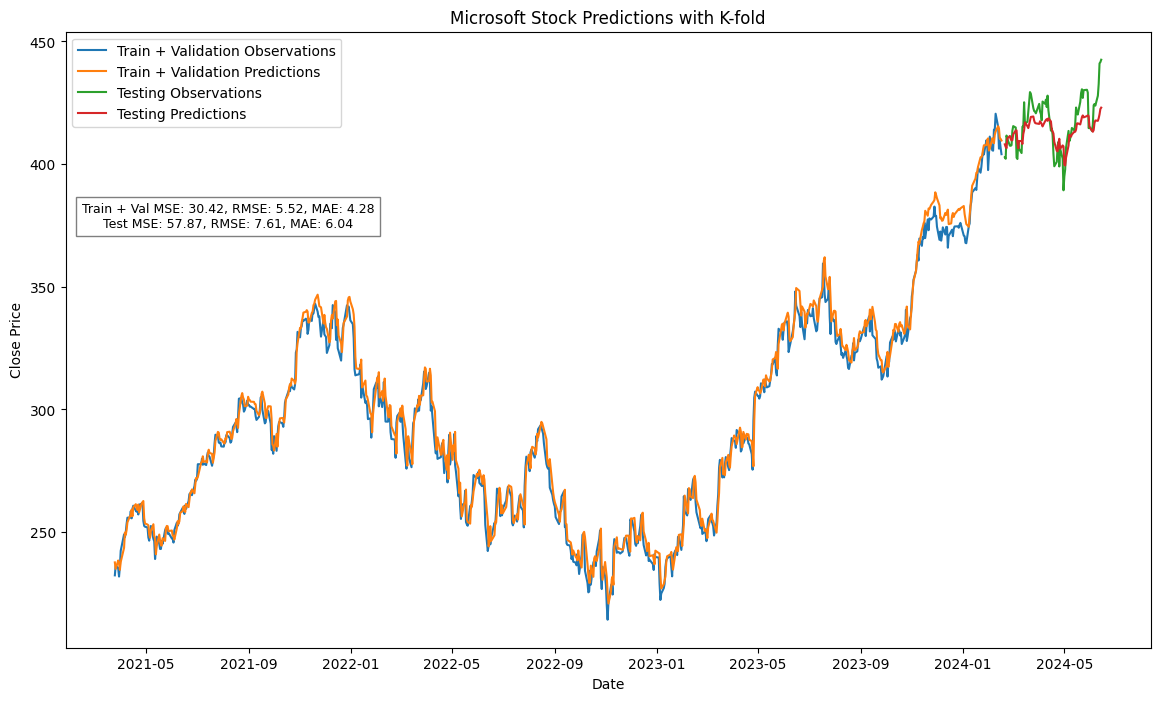

In [ ]:
plt.figure(figsize=(14, 8))

#plot train + validation data
plt.plot(dates_train_val, y_train_val, label='Train + Validation Observations')
plt.plot(dates_train_val, train_val_predictions, label='Train + Validation Predictions')

#plot test data
plt.plot(dates_test, y_test, label='Testing Observations')
plt.plot(dates_test, test_predictions_kf, label='Testing Predictions')

plt.text(0.15, 0.7, f'Train + Val MSE: {mse_train_val_kf:.2f}, RMSE: {rmse_train_val_kf:.2f}, MAE: {mae_train_val_kf:.2f}\n'
                     f'Test MSE: {mse_test_kf:.2f}, RMSE: {rmse_test_kf:.2f}, MAE: {mae_test_kf:.2f}',
         fontsize=9, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, horizontalalignment='center', verticalalignment='center')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Microsoft Stock Predictions with K-fold')
plt.legend()
plt.show()


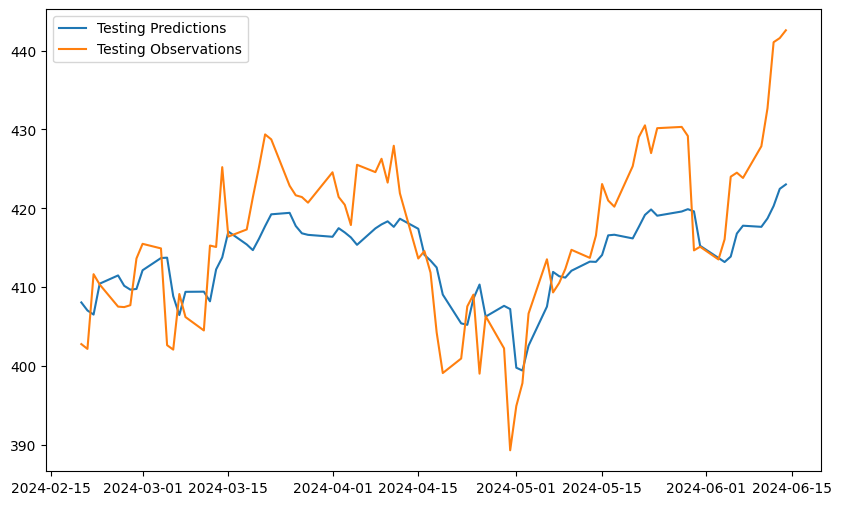

In [ ]:
#closer look when apply the model for test set
plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions_kf)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

## Apply the model to predict stock of other companies

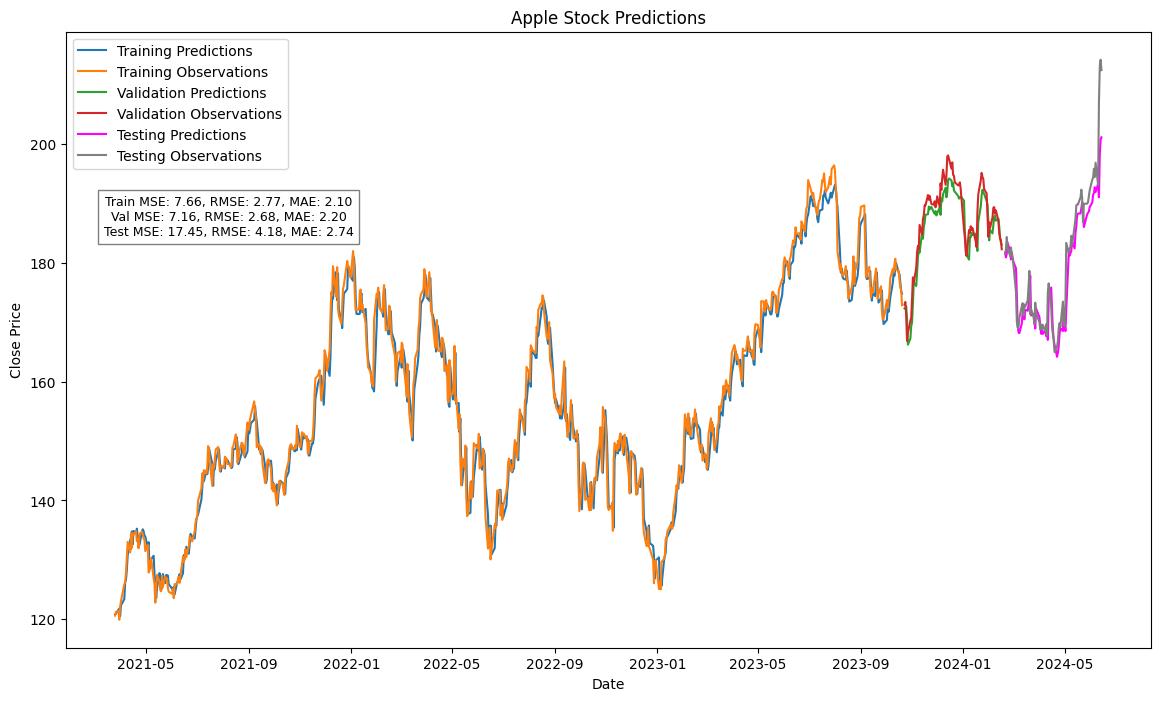

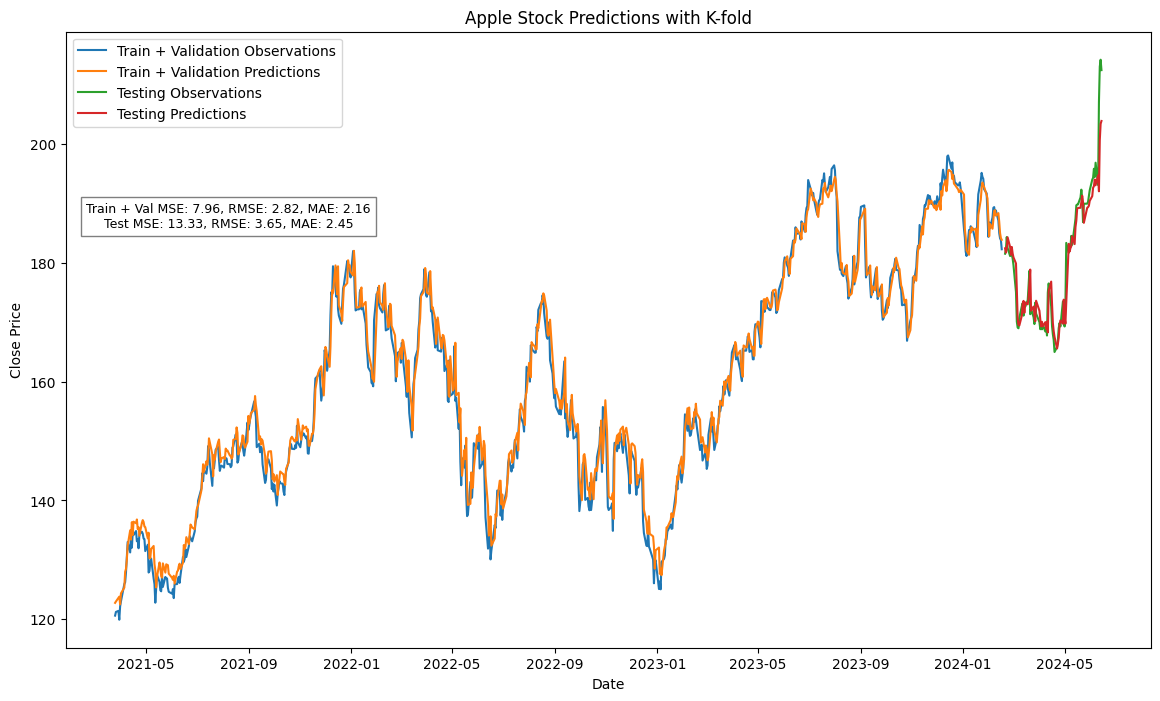

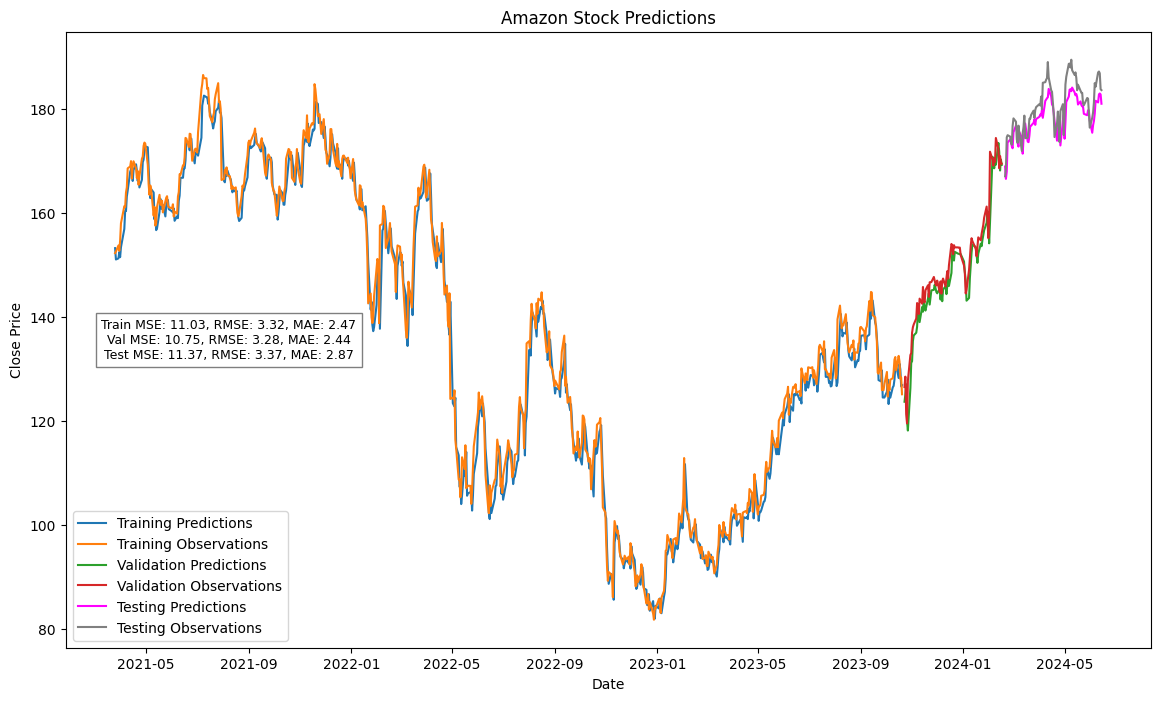

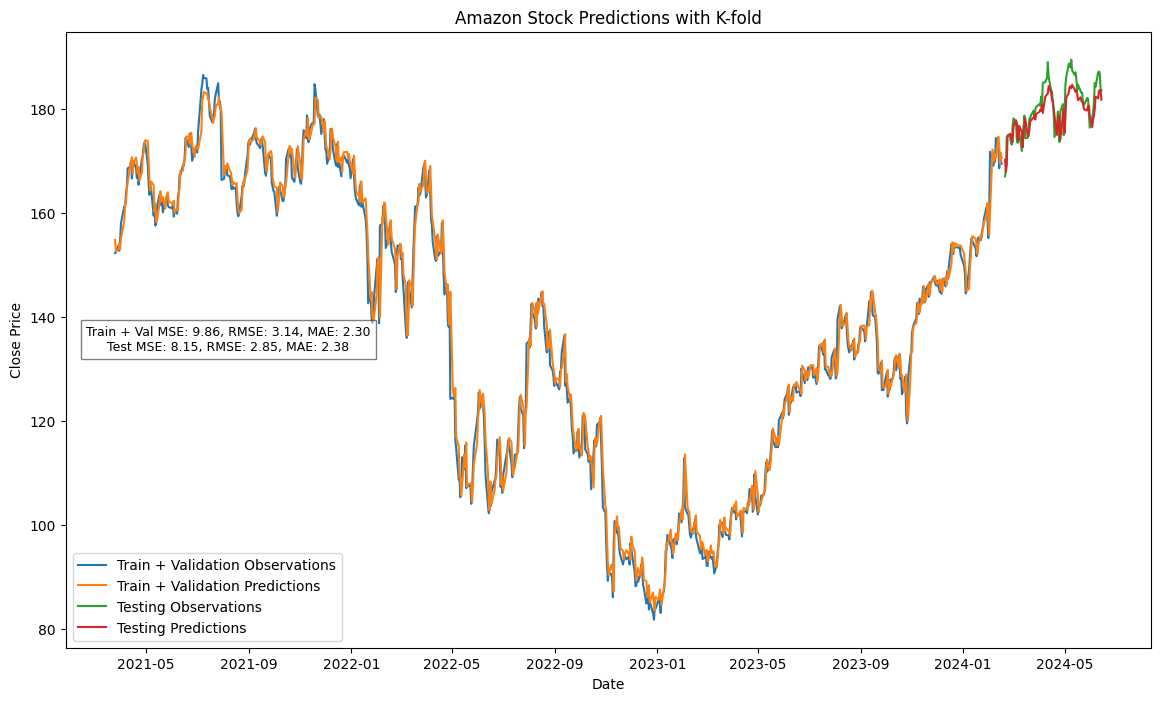

## Comments on the Model

Microsoft: K-fold cross-validation significantly improves prediction performance, significantly reducing error metrics: RMSE decreased from 53.40 to 7.61.

Amazon: K-fold cross-validation also helps improve prediction performance, but the level of improvement is not as great as Microsoft, RMSE decreased from 3.37 to 2.85.

Apple: similar to Amazon, RMSE decreased from 4.18 to 3.65.

The prediction results indicate that K-fold cross-validation helps to mitigate overfitting and improve the generalization capability of the model. The model's performance in predicting stocks for Microsoft, Amazon, and Apple improved after applying K-fold cross-validation. Although the level of improvement varied, the error metrics (MSE, RMSE, MAE) all decreased, indicating enhanced prediction performance.

The varying levels of improvement among different stocks suggest that the effectiveness of K-fold cross-validation may depend on the specific characteristics of each dataset. For stocks with high volatility, K-fold cross-validation can help reduce bias and enhance prediction accuracy.



## Comments on Stock Prediction


The stock market is highly volatile, with many factors affecting stock prices such as economic news, government policies, and global events. This makes stock price prediction challenging and susceptible to noise.

In addition to selecting the appropriate model, proper data preprocessing, thorough model evaluation, and continuously updating economic and market parameters, along with adjusting the model based on new data, are crucial to achieving accurate prediction results.